In [1]:
import re
import math
import operator
import itertools
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from urllib import urlopen

%matplotlib inline

# Finding Hidden Messages in DNA

## Chapter 1: Where in the Genome Does DNA Replication Begin?

In [2]:
# Transform symbols A, C, G, and T into the respective integers 0, 1, 2, and 3.
def symbol_to_number(symbol):
    symbol_dict = {"A":0, "C":1, "G":2, "T":3}
    return symbol_dict[symbol]
    
print symbol_to_number("T")

3


In [3]:
## Transform integers 0, 1, 2, and 3 into the respective symbols A, C, G, and T.

def number_to_symbol(index):
    symbol_dict = {0:"A", 1:"C", 2:"G", 3:"T"}
    return symbol_dict[index]
    
print number_to_symbol(3)

T


In [4]:
## Pattern to Number:
## Transform a k-mer Pattern into an integer.

def pattern_to_number(pattern):
    if len(pattern) == 0:
        return 0
    else:
        symbol = pattern[-1]
        pattern = pattern[:-1]
        return 4*pattern_to_number(pattern) + symbol_to_number(symbol)     
        
print pattern_to_number("ATGCAA")

912


In [5]:
## Number to Pattern:
## Transform an integer between 0 and 4k − 1 into a k-mer.

def number_to_pattern(index, k):
    if k == 1:
        return number_to_symbol(index)
    else:
        prefix_index = int(math.floor(index/4))
        r = index % 4
        prefix_pattern = number_to_pattern(prefix_index, k-1)
        symbol = number_to_symbol(r)
        return prefix_pattern + symbol

print number_to_pattern(5752, 9)

AACCGCTGA


In [6]:
## Computing Frequencies:
## Input: A DNA string Text followed by an integer k.
## Output: FrequencyArray(Text).

def computing_frequencies(text, k):
    num = 4**k
    frequency_array = [0]*num
    for i in range(len(text) - k+1):    
        pattern = text[i : k+i] 
        j = pattern_to_number(pattern)
        frequency_array[j] = frequency_array[j] + 1        
    return frequency_array

string = "".join(open("./data/computing_frequencies.txt")).split() 
print computing_frequencies(string[0], int(string[1]))

[0, 0, 2, 0, 0, 1, 2, 3, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 3, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 3, 0, 1, 1, 2, 1, 1, 1, 3, 0, 2, 1, 2, 0, 1, 3, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 3, 1, 1, 3, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 

In [7]:
## Pattern Count:
## Count the number of times that a k-mer Pattern appears as a substring of text
## Input: Strings text and pattern
## Output: Count(text, pattern)pattern_count

def pattern_count(text, pattern):
    count = 0
    k = len(pattern)
    for i in range(len(text) - k+1):
        if text[i : k+i] == pattern:
            count = count + 1      
    return count

string = "".join(open("./data/pattern_count.txt")).split()
print pattern_count(string[0], string[1])

21


In [8]:
## Frequent Words Problem:
## Find the most frequent k-mers in a string
## Input: A string Text and an integer k
## Output: All most frequent k-mers in Text

def frequent_words_problem(text, k, t=0):
    frequent_patterns = {}
    for i in range(len(text) - k):
        pattern = text[i : k+i]
        frequent_patterns[pattern] = pattern_count(text, pattern)
    if t == 0:
        return [key for key, value in frequent_patterns.items() if value == max(frequent_patterns.values())]
    else:
        return [key for key, value in frequent_patterns.items() if value >= t]

string = "".join(open("./data/frequent_words_problem.txt")).split()
print frequent_words_problem(string[0], int(string[1]))

['CACCTCGGAAT', 'CACCTCGGACC']


In [9]:
def faster_frequent_words(text, k):
    num = 4**k
    frequent_patterns = []
    frequency_array = computing_frequencies(text, k)
    max_count = max(frequency_array)
    for i in range(num):
        if frequency_array[i] == max_count:
            pattern = number_to_pattern(i, k)
            frequent_patterns.append(pattern)
    return frequent_patterns
    
string = "".join(open("./data/frequent_words_problem.txt")).split()
print faster_frequent_words(string[0], int(string[1]))

['CACCTCGGAAT', 'CACCTCGGACC']


In [10]:
def frequent_words_by_sorting(text, k, t=0):
    index = []
    count = []
    frequent_patterns = []
    for i in range(len(text) - k):
        pattern = text[i : k+i]
        index.append(pattern_to_number(pattern))
        count.append(1)
    index.sort()
    for i in range(len(text) - k):
        if index[i] == index[i-1]:
            count[i] = count[i-1] + 1
    max_count = max(count)
    for i in range(len(text) - k):
        if t == 0:
            if count[i] == max_count:
                pattern = number_to_pattern(index[i], k)
                frequent_patterns.append(pattern)
        else:
            if count[i] >= t:
                pattern = number_to_pattern(index[i], k)
                frequent_patterns.append(pattern)
                
    return frequent_patterns

string = "".join(open("./data/frequent_words_problem.txt")).split()
print frequent_words_by_sorting(string[0], int(string[1]))

['CACCTCGGAAT', 'CACCTCGGACC']


In [11]:
## Reverse Complement Problem:
## Find the reverse complement of a DNA string
## Input: A DNA string Pattern
## Output: Pattern, the reverse complement of Pattern
                
def reverse_complement_problem(string):    
    dictionary = {"A":"T", "T":"A", "C":"G", "G":"C"}
    output = [dictionary[x] for x in string[::-1]]
    return "".join(output)
    
string = "".join(open("./data/reverse_complement_problem.txt")).split()
print reverse_complement_problem(string[0][:100])

CCCTCATCGGCGATGATCGAAAACGAGAATGGATGGTAGAGCGATAGCAGGATGATCCGGGCGTAAATCACGGATAGTTAGTCTGGCTATAGGAGGCCGA


In [12]:
## Pattern Matching Problem: 
## Find all occurrences of a pattern in a string
## Input: Strings Pattern and Genome
## Output: All starting positions in Genome where Pattern appears as a substring

def pattern_matching_problem(pattern, genome):    
    position = []
    k = len(pattern)        
    for i in range(len(genome)):
        if pattern == genome[i:i+k]:
            position.append(str(i))            
    return position
    
string = "".join(open("./data/pattern_matching_problem.txt")).split()
print pattern_matching_problem(string[0], string[1])

['71', '94', '188', '194', '302', '317', '339', '345', '386', '454', '502', '508', '543', '575', '634', '641', '647', '676', '707', '745', '812', '897', '952', '958', '964', '1112', '1150', '1175', '1190', '1205', '1219', '1226', '1260', '1268', '1274', '1305', '1327', '1395', '1401', '1407', '1420', '1456', '1480', '1540', '1566', '1605', '1655', '1717', '1723', '1735', '1779', '1792', '1841', '1891', '1932', '1939', '1996', '2002', '2016', '2041', '2055', '2081', '2087', '2094', '2148', '2168', '2182', '2309', '2355', '2361', '2367', '2383', '2405', '2433', '2459', '2502', '2570', '2577', '2649', '2655', '2662', '2683', '2750', '2756', '2782', '2885', '2891', '2929', '2951', '2969', '2982', '3034', '3056', '3062', '3080', '3086', '3133', '3140', '3162', '3187', '3203', '3228', '3279', '3295', '3301', '3320', '3326', '3332', '3367', '3374', '3387', '3419', '3447', '3481', '3496', '3523', '3551', '3567', '3593', '3607', '3631', '3637', '3669', '3683', '3689', '3719', '3793', '3799', '3

In [13]:
## Pattern Matching Problem to the Vibrio cholerae genome

pattern = "ATGATCAAG"
genome = urlopen("https://stepic.org/media/attachments/lessons/3/Vibrio_cholerae.txt").read()
genome = genome.decode("utf-8")
print pattern_matching_problem(pattern, genome)

['116556', '149355', '151913', '152013', '152394', '186189', '194276', '200076', '224527', '307692', '479770', '610980', '653338', '679985', '768828', '878903', '985368']


In [14]:
## Pattern Matching Problem to the Vibrio cholerae genome

pattern = "CTTGATCAT" 
print pattern_matching_problem(pattern, genome)

['60039', '98409', '129189', '152283', '152354', '152411', '163207', '197028', '200160', '357976', '376771', '392723', '532935', '600085', '622755', '1065555']


In [15]:
## Frequent Words Problem to the Thermotoga petrophila genome

genome = urlopen("https://stepic.org/media/attachments/lessons/4/Thermotoga-petrophila.txt").read()
genome = genome.decode("utf-8")
print frequent_words_problem(genome[:1000], 9)

[u'TTGAAATCT', u'TTTGAAATC', u'CTATGAGAA', u'GAATTTCTC', u'TCGTTTCCT']


In [16]:
print faster_frequent_words(genome, 9)

['TTTTTCTTT']


In [17]:
print frequent_words_by_sorting(genome, 9)

['TTTTTCTTT']


In [18]:
## Clump Finding Problem: 
## Find patterns forming clumps in a string
## Input: A string Genome, and integers k, L, and t
## Output: All distinct k-mers forming (L, t)-clumps in Genome

def clump_finding_problem(string, k, L, t):
    words = []    
    for i in range(len(string) - L+1):
        clump = string[i: L+i]
        words.append(frequent_words_by_sorting(clump, k, t))
    return list(set(list(itertools.chain(*words))))

## string = "CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA"
## print clump_finding_problem(string, k=5, L=50, t=4)

string = "".join(open("./data/clump_finding_problem.txt")).split()
print clump_finding_problem(string[0], int(string[1]), int(string[2]), int(string[3]))

['CATGACACCG', 'GCTAGGTCTC', 'CATTTAGCAC', 'GCAACTCTTT', 'CGACTTTATA', 'TATTACCGCT', 'TAGAATTTTA', 'AGGTAGCGCC']


In [19]:
def clump_finding_problem(genome, k, L, t):
    num = 4**k
    clump = [0]*num
    frequent_patterns = []
    for i in range(len(genome) - L+1):  
        text = genome[i: L+i]
        frequency_array = computing_frequencies(text, k)
        for j in range(num):
            if frequency_array[j] >= t:
                clump[j] = 1
    for i in range(num):
        if clump[i] == 1:
            pattern = number_to_pattern(i, k)
            frequent_patterns.append(pattern)
    return frequent_patterns

string = "CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA"
print clump_finding_problem(string, k=5, L=50, t=4)

## string = "".join(open("./data/clump_finding_problem.txt")).split()
## clump_finding_problem(string[0], int(string[1]), int(string[2]), int(string[3]))

['CGACA', 'GAAGA']


In [20]:
def better_clump_finding(genome, k, L, t):
    num = 4**k
    clump = [0]*num
    frequent_patterns = []
    text = genome[0:L]
    frequency_array = computing_frequencies(text, k)
    for i in range(num):
        if frequency_array[i] >= t:
            clump[i] = 1
    for i in range(len(genome) - L+1):
        first_pattern = genome[i : i+k]
        j = pattern_to_number(first_pattern)
        frequency_array[j] = frequency_array[j] - 1
        last_pattern = genome[i+L-k : i+L]
        j = pattern_to_number(last_pattern)
        frequency_array[j] = frequency_array[j] + 1
        if frequency_array[j] >= t:
            clump[j] = 1
    for i in range(num):
        if clump[i] == 1:
            pattern = number_to_pattern(i, k)
            frequent_patterns.append(pattern)
    return frequent_patterns    

## string = "CGGACTCGACAGATGTGAAGAACGACAATGTGAAGACTCGACACGACAGAGTGAAGAGAAGAGGAAACATTGTAA"
## print better_clump_finding(string, k=5, L=50, t=4)

string = "".join(open("./data/clump_finding_problem.txt")).split()
print better_clump_finding(string[0], int(string[1]), int(string[2]), int(string[3]))

['AGGTAGCGCC', 'CATGACACCG', 'CATTTAGCAC', 'CGACTTTATA', 'GCAACTCTTT', 'GCTAGGTCTC', 'TAGAATTTTA', 'TATTACCGCT']


In [21]:
## How many different 9-mers form (500,3)-clumps in the E. coli genome

genome = urlopen("https://stepic.org/media/attachments/lessons/4/E-coli.txt").read()
genome = genome.decode("utf-8")
print better_clump_finding(genome, 9, 500, 3)

['AAAAAAAAG', 'AAAAAAAGC', 'AAAAAAGCC', 'AAAAACCCG', 'AAAAAGCAG', 'AAAAAGCCC', 'AAAAAGCCG', 'AAAAATGAT', 'AAAAATTGA', 'AAAACCCGC', 'AAAAGCCCG', 'AAAAGCGGC', 'AAAAGTTGC', 'AAAATATTT', 'AAAATCGCA', 'AAACCCGCC', 'AAACGCCTT', 'AAACTGACC', 'AAACTGGCA', 'AAAGAAGCT', 'AAAGCAGAA', 'AAAGCCCGT', 'AAAGCCGCC', 'AAAGCGCGC', 'AAAGCGGCA', 'AAAGCGGCT', 'AAAGCGGTT', 'AAAGTGATG', 'AAAGTTGCC', 'AAATAATCT', 'AAATATGGC', 'AAATCCGGC', 'AAATCGCAG', 'AAATGATGA', 'AAATGGCGA', 'AAATGGCGC', 'AAATGGCGG', 'AACAACCGG', 'AACACCTGA', 'AACAGCAAC', 'AACAGCACG', 'AACAGGCTA', 'AACAGGTCG', 'AACCAGCAG', 'AACCCCCAC', 'AACCCGAAG', 'AACCCGCCG', 'AACCGATGC', 'AACCGGTTG', 'AACCGTAGG', 'AACCTCCGA', 'AACGCCTGA', 'AACGCCTTA', 'AACGCGTCT', 'AACGCTCTC', 'AACGGCTGT', 'AACTGACCG', 'AACTGGCTG', 'AACTGTAGG', 'AAGAAAGCG', 'AAGAACAGC', 'AAGAACAGG', 'AAGACGCAC', 'AAGACGCAT', 'AAGACGCGC', 'AAGACGCGT', 'AAGAGATGG', 'AAGATGCGC', 'AAGCAGAAG', 'AAGCCCGTA', 'AAGCCGCCG', 'AAGCCGCTA', 'AAGCCGCTT', 'AAGCGCGCA', 'AAGCGGCAG', 'AAGCGGCTG', 'AAGCGGGTT'

In [22]:
## Skewi(Genome) is the difference between the total number of occurrences of G 
## and the total number of occurrences of C in the first i nucleotides of Genome.  

def skew(genome):
    output = [0]
    count = 0    
    for x in genome:
        count = count+1 if x=="G" else count
        count = count-1 if x=="C" else count
        output.append(count)       
    return output

genome = "GAGCCACCGCGATA"
print skew(genome)

[0, 1, 1, 2, 1, 0, 0, -1, -2, -1, -2, -1, -1, -1, -1]


In [23]:
## Minimum Skew Problem: Find a position in a genome minimizing the skew.
## Input: A DNA string Genome.
## Output: All integer(s) i minimizing Skew_i(Genome) among all values of i (from 0 to |Genome|).

def minimum_skew_problem(genome):            
    p = np.array(skew(genome))
    minimum_skew = np.where(p == min(p))
    return list(minimum_skew[0])

genome = "".join(open("./data/minimum_skew_problem.txt")).split()            
print minimum_skew_problem(genome[0])

[2692, 2693]


In [24]:
## Hamming Distance Problem: Compute the Hamming distance between two strings.
## Input: Two strings of equal length.
## Output: The Hamming distance between these strings.

def hamming_distance(p, q):
    dist = 0
    if len(p) == len(q):
        for x, y in zip(p, q):
            dist = dist+1 if x != y else dist
    return dist

genome = "".join(open("./data/hamming_distance_problem.txt")).split()            
print hamming_distance(genome[0], genome[1])

845


In [25]:
## Approximate Pattern Matching Problem: Find all approximate occurrences of a pattern in a string.
## Input: Strings Pattern and Text along with an integer d.
## Output: All starting positions where Pattern appears as a substring of Text with at most d mismatches.

def approximate_pattern_matching_problem(pattern, genome, d):
    pos = []
    k = len(pattern)
    for i in range(len(genome)-k+1):
        dist = hamming_distance(pattern, genome[i:i+k])
        if dist <= d:
            pos.append(i)
    return pos

## pattern ="ATTCTGGA"
## genome = "CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAAT"
## d = 3
## print approximate_pattern_matching_problem(pattern, genome, d)

string =  "".join(open("./data/approximate_pattern_matching_problem.txt")).split()
print approximate_pattern_matching_problem(string[0], string[1], int(string[2]))

[34, 376, 400, 466, 502, 514, 564, 719, 743, 756, 781, 838, 874, 970, 1018, 1135, 1247, 1293, 1344, 1409, 1524, 1549, 1777, 1810, 1940, 1964, 1982, 2099, 2142, 2189, 2229, 2257, 2290, 2308, 2317, 2388, 2417, 2525, 2630, 2644, 2723, 2832, 2896, 2970, 3425, 3573, 3596, 3731, 3743, 3750, 3879, 3896, 3913, 3916, 3928, 4059, 4110, 4146, 4171, 4177, 4185, 4394, 4423, 4500, 4546, 4565, 4581, 4656, 4709, 4800, 4840, 4892, 4930, 4990, 5094, 5250, 5308, 5331, 5432, 5451, 5500, 5523, 5614, 5673, 5794, 5889, 5890, 5902, 6003, 6058, 6100, 6213, 6404, 6472, 6490, 6530, 6557, 6656, 7003, 7020, 7027, 7104, 7297, 7369, 7413, 7470, 7652, 7730, 7805, 8201, 8312, 8316, 8349, 8370, 8413, 8454, 8504, 8709, 8738, 8762, 8794, 9126, 9179, 9255, 9334, 9406, 9419, 9439, 9465, 9548, 9595, 9651, 9693, 9728, 9741, 9822, 9841, 9877, 9940, 9941, 10068, 10115, 10150, 10201, 10219, 10304, 10310, 10435, 10463, 10515, 10527, 10548, 10565, 10605, 10663, 10690, 10757, 10819, 10836, 11050, 11067, 11122, 11153, 11161, 11171,

In [26]:
## Implement ApproximatePatternCount.
## Input: Strings Text and Pattern as well as an integer d.
## Output: Count_d(Text, Pattern).            
##        Given strings Text and Pattern as well as an integer d, we define Count_d(Text, Pattern) 
##        as the total number of occurrences of Pattern in Text with at most d mismatches.

def approximate_pattern_count(text, pattern, d):
    return len(approximate_pattern_matching_problem(pattern, text, d))
    
string = "".join(open("./data/approximate_pattern_count.txt")).split()
print approximate_pattern_count(string[0], string[1], int(string[2]))

59


In [27]:
## Generate the 1-neigborhood of Pattern.

def immediate_neighbors(pattern):
    neighborhood = [pattern]
    for i in range(len(pattern)):
        symbol = pattern[i]
        for x in pattern:
            if x != symbol:
                temp = list(pattern)
                temp[i] = x
                neighborhood.append("".join(temp))
    return neighborhood

print immediate_neighbors("ACGT")

['ACGT', 'CCGT', 'GCGT', 'TCGT', 'AAGT', 'AGGT', 'ATGT', 'ACAT', 'ACCT', 'ACTT', 'ACGA', 'ACGC', 'ACGG']


In [28]:
## Given a k-mer Pattern, we therefore define its d-neighborhood Neighbors(Pattern, d) 
## as the set of all k-mers that are close to Pattern.
## Implement Neighbors to find the d-neighborhood of a string.
## Input: A string Pattern and an integer d.
## Output: The collection of strings Neighbors(Pattern, d).

def neighbors(pattern, d):
    if d == 0:
        return pattern
    if len(pattern) == 1: 
        return ["A","C","T","G"]
    neighborhood = []
    suffix_neighbors = neighbors(pattern[1:], d) 
    for text in suffix_neighbors:
        if hamming_distance(pattern[1:], text) < d:
            for x in ["A","C","G","T"]:
                neighborhood.append(x + text)
        else:
            neighborhood.append(pattern[0] + text)
    return neighborhood

print neighbors("ACATG", 2)

['ACAAA', 'ACACA', 'ACAGA', 'AAATA', 'ACATA', 'CCATA', 'GCATA', 'TCATA', 'AGATA', 'ATATA', 'ACCTA', 'ACGTA', 'ACTTA', 'ACAAC', 'ACACC', 'ACAGC', 'AAATC', 'ACATC', 'CCATC', 'GCATC', 'TCATC', 'AGATC', 'ATATC', 'ACCTC', 'ACGTC', 'ACTTC', 'ACAAT', 'ACACT', 'ACAGT', 'AAATT', 'ACATT', 'CCATT', 'GCATT', 'TCATT', 'AGATT', 'ATATT', 'ACCTT', 'ACGTT', 'ACTTT', 'AAAAG', 'ACAAG', 'CCAAG', 'GCAAG', 'TCAAG', 'AGAAG', 'ATAAG', 'ACCAG', 'ACGAG', 'ACTAG', 'AAACG', 'ACACG', 'CCACG', 'GCACG', 'TCACG', 'AGACG', 'ATACG', 'ACCCG', 'ACGCG', 'ACTCG', 'AAAGG', 'ACAGG', 'CCAGG', 'GCAGG', 'TCAGG', 'AGAGG', 'ATAGG', 'ACCGG', 'ACGGG', 'ACTGG', 'AAATG', 'CAATG', 'GAATG', 'TAATG', 'ACATG', 'CCATG', 'GCATG', 'TCATG', 'AGATG', 'CGATG', 'GGATG', 'TGATG', 'ATATG', 'CTATG', 'GTATG', 'TTATG', 'AACTG', 'ACCTG', 'CCCTG', 'GCCTG', 'TCCTG', 'AGCTG', 'ATCTG', 'AAGTG', 'ACGTG', 'CCGTG', 'GCGTG', 'TCGTG', 'AGGTG', 'ATGTG', 'AATTG', 'ACTTG', 'CCTTG', 'GCTTG', 'TCTTG', 'AGTTG', 'ATTTG']


In [29]:
def exact_neighbors(pattern, d):
    return [text for text in neighbors(pattern, d) if hamming_distance(pattern, text) == d]
    
print exact_neighbors("ACATG", 2)

['ACAAA', 'ACACA', 'ACAGA', 'AAATA', 'CCATA', 'GCATA', 'TCATA', 'AGATA', 'ATATA', 'ACCTA', 'ACGTA', 'ACTTA', 'ACAAC', 'ACACC', 'ACAGC', 'AAATC', 'CCATC', 'GCATC', 'TCATC', 'AGATC', 'ATATC', 'ACCTC', 'ACGTC', 'ACTTC', 'ACAAT', 'ACACT', 'ACAGT', 'AAATT', 'CCATT', 'GCATT', 'TCATT', 'AGATT', 'ATATT', 'ACCTT', 'ACGTT', 'ACTTT', 'AAAAG', 'CCAAG', 'GCAAG', 'TCAAG', 'AGAAG', 'ATAAG', 'ACCAG', 'ACGAG', 'ACTAG', 'AAACG', 'CCACG', 'GCACG', 'TCACG', 'AGACG', 'ATACG', 'ACCCG', 'ACGCG', 'ACTCG', 'AAAGG', 'CCAGG', 'GCAGG', 'TCAGG', 'AGAGG', 'ATAGG', 'ACCGG', 'ACGGG', 'ACTGG', 'CAATG', 'GAATG', 'TAATG', 'CGATG', 'GGATG', 'TGATG', 'CTATG', 'GTATG', 'TTATG', 'AACTG', 'CCCTG', 'GCCTG', 'TCCTG', 'AGCTG', 'ATCTG', 'AAGTG', 'CCGTG', 'GCGTG', 'TCGTG', 'AGGTG', 'ATGTG', 'AATTG', 'CCTTG', 'GCTTG', 'TCTTG', 'AGTTG', 'ATTTG']


In [30]:
## A most frequent k-mer with up to d mismatches in Text is simply a string Pattern maximizing Countd(Text, Pattern) among all k-mers. 
## Frequent Words with Mismatches Problem: Find the most frequent k-mers with mismatches in a string.
## Input: A string Text as well as integers k and d. (You may assume k ≤ 12 and d ≤ 3.)
## Output: All most frequent k-mers with up to d mismatches in Text.

def frequent_words_with_mismatches_problem(text, k, d):
    num = 4**k
    frequent_patterns = []
    close = [0]*num
    frequency_array = [0]*num
    for i in range(len(text) - k):
        neighborhood = neighbors(text[i: i+k], d)
        for pattern in neighborhood:
            index = pattern_to_number(pattern)
            close[index] = 1
    for i in range(num):
        if close[i] == 1:
            pattern = number_to_pattern(i, k)
            frequency_array[i] = approximate_pattern_count(text, pattern, d)
        max_count = max(frequency_array)
    for i in range(num):
        if frequency_array[i] == max_count:
            pattern = number_to_pattern(i, k)
            frequent_patterns.append(pattern)
    return frequent_patterns 
        
text = "ACGTTGCATGTCGCATGATGCATGAGAGCT"
k = 4 
d = 1  
print frequent_words_with_mismatches_problem(text, k, d)

['ATGC', 'ATGT', 'GATG']


In [31]:
## Frequent Words with Mismatches Problem by sorting.

def frequent_words_with_mismatches_problem_sorting(text, k, d):
    frequent_patterns = []
    neighborhoods = []
    for i in range(len(text) - k):
        neighborhood = neighbors(text[i: i+k], d)
        for n in neighborhood:
            neighborhoods.append(n) 
    index = []
    count = []
    for i in range(len(neighborhoods)):
        pattern = neighborhoods[i] 
        index.append(pattern_to_number(pattern))
        count.append(1)
    index.sort()
    for i in range(len(neighborhoods)-1):
        if index[i] == index[i+1]:
            count[i+1] = count[i] + 1
    max_count = max(count)
    for i in range(len(neighborhoods)):
        if count[i] == max_count:
            pattern = number_to_pattern(index[i], k)
            frequent_patterns.append(pattern)
    return frequent_patterns 

## text = "ACGTTGCATGTCGCATGATGCATGAGAGCT"
## k = 4 
## d = 1  
## print frequent_words_with_mismatches_problem(text, k, d)

string = "".join(open("./data/frequent_words_with_mismatches_problem.txt")).split()
print frequent_words_with_mismatches_problem_sorting(string[0], int(string[1]), int(string[2]))

['GTTGAGTTT']


In [32]:
## Frequent Words with Mismatches and Reverse Complements Problem: Find the most frequent k-mers (with mismatches and reverse complements) in a DNA string.
## Input: A DNA string Text as well as integers k and d.
## Output: All k-mers Pattern maximizing the sum Countd(Text, Pattern)+ Countd(Text, Pattern) over all possible k-mers.

def frequent_words_with_mismatches_and_reverse_complements_problem(text, k, d):
    num = 4**k
    frequent_patterns = []
    close = [0]*num
    frequency_array = [0]*num
    for i in range(len(text) - k):
        neighborhood = neighbors(text[i: i+k], d)
        for pattern in neighborhood:
            index = pattern_to_number(pattern)
            close[index] = 1
    for i in range(num):
        if close[i] == 1:
            pattern = number_to_pattern(i, k)
            complement = reverse_complement_problem(pattern)
            frequency_array[i] = approximate_pattern_count(text, pattern, d) + approximate_pattern_count(text, complement, d)
    max_count = max(frequency_array)
    for i in range(num):
        if frequency_array[i] == max_count:
            pattern = number_to_pattern(i, k)
            frequent_patterns.append(pattern)
    return frequent_patterns 

## text = "ACGTTGCATGTCGCATGATGCATGAGAGCT"
## k = 4
## d = 1
## print frequent_words_with_mismatches_and_reverse_complements_problem(text, k, d)

string = "".join(open("./data/frequent_words_with_mismatches_and_reverse_complements_problem.txt")).split()
print frequent_words_with_mismatches_and_reverse_complements_problem(string[0], int(string[1]), int(string[2]))

['CGCGGAACTC', 'GAGTTCCGCG']


# Chapter 2: Brute Force Algorithms.
> ## How Do We Sequence Antibiotics?

In [33]:
genetic_code = pd.read_csv("./data/codon_table.txt", delimiter=" ", names=["codon", "amino_acid"])
genetic_code

,codon,amino_acid
0,AAA,K
1,AAC,N
2,AAG,K
3,AAU,N
4,ACA,T
5,ACC,T
6,ACG,T
7,ACU,T
8,AGA,R
9,AGC,S


In [34]:
protein_dictionary = {"His":"H", "Gln":"Q", "Pro":"P", "Arg":"R", "Leu":"L", "Asp":"D", "Glu":"E", "Ala":"A", "Gly":"G", "Val":"V",
                      "Tyr":"Y", "Ser":"S", "Cys":"C", "Trp":"W", "Phe":"F", "Asn":"N", "Lys":"K", "Thr":"T", "Ile":"I", "Met":"M"}
protein_dictionary

{'Ala': 'A',
 'Arg': 'R',
 'Asn': 'N',
 'Asp': 'D',
 'Cys': 'C',
 'Gln': 'Q',
 'Glu': 'E',
 'Gly': 'G',
 'His': 'H',
 'Ile': 'I',
 'Leu': 'L',
 'Lys': 'K',
 'Met': 'M',
 'Phe': 'F',
 'Pro': 'P',
 'Ser': 'S',
 'Thr': 'T',
 'Trp': 'W',
 'Tyr': 'Y',
 'Val': 'V'}

In [35]:
## Protein Translation Problem: Translate an RNA string into an amino acid string.
## Input: An RNA string Pattern and the array GeneticCode.
## Output: The translation of Pattern into an amino acid string Peptide.
                
def protein_translation_problem(pattern, genetic_code):
    peptide = []
    genes = re.findall("...", pattern)
    for gene in genes:
        amino_acid = genetic_code[genetic_code.codon==gene].amino_acid.values[0]
        if str(amino_acid) != "nan":
            peptide.append(amino_acid)
    return "".join(str(x) for x in peptide)    

## pattern = "AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA"
## print protein_translation_problem(pattern, genetic_code)

string = "".join(open("./data/protein_translation_problem.txt")).split()
protein_translation_problem(string[0], genetic_code)

'MLVQSFNPAPDSCSSTTLPYSSQDGVRLSPAVVPTSLRSHLPNMEYGTTKNLNESPLWDTNSNRAIKDYLSCTPLCPLFPSVVTCSTRESSSLETTWGIRVCLAKYLLYRPIVYTANFSSWVSVRCVSYQENFVLTERQYPTYRSIILSYLLARPWTLIGKLLVGDELGLPQTLVGTLLVTRPTIVVIKIPSAGLHCCTIITLKLWDVGHDVMAGSSTTNGQGTRPQAVPPNHRLSLGMAYTPTMGGRGVIGGLKAVSAVRSNPEMCTTGPDQIYVVDPLKTLGGPPCPLDTQLASPEWNSGRLRRSDLTSSNTCSTRSWCLSTSTVERVISSPRRLFRTTGHIPVINSPRITLPIIGPTSGGMLPPRCLVTLLDRTNYWPRKHGLAHYWASCSLPSSRWPYQAGAHATSPALKRSPFQSYSCLALNSCVRRFVCPEQADHTYCSIHPVLSITDWALVNLWRLVQCNCLPTSSVHSEHGVVPGPENQPGLDYRQQMQMREDFSTRRAAVNLGLTGHTPQTVGAQSHGYTRAALLCTERPRFAPSSVSFAKVRDYELRRILSKNTVATRIESEFVTKFAQSSLVRSSLNKGGSSRTRLAECGPGQTRAKVTPYELLLFDWGAKSYSPFAAGTSAGLSNLPAKLVRLYGIRRRETSPMALNETLPAQRAILLKRLPIWVQLAAPSRQTVSRELNASHSVRAGLPICMYASAIDCVAWNMTGELRGLKWPAIGSVEPLRGKPFSLRLRLWLERLMMMIKGGAQYVAVPARGVSVLGRLMRAAGSLQRYAWSDEITNLSDALGVFKSCQRRLHETYISSLRSQYGERRNGQPLEALSFRTHFRVCASIERRPSKTWGLSSSVTSVFSMSRPGPLSVLSTGERRRMPRKKTGLLICALCHHQHEEEKSMGNLQCYLLLSRLLKARVCPNRLHESELPVESSTVICRRMLLGCTVTQDARSGSLLCSRVRCKGYRTNLYIRLPKIHSQGQHHMLARKLRVLYATM

In [36]:
## Peptide Encoding Problem: Find substrings of a genome encoding a given amino acid sequence.
## Input: A DNA string Text, an amino acid string Peptide, and the array GeneticCode.
## Output: All substrings of Text encoding Peptide (if any such substrings exist).

def peptide_encoding_problem(dna, amino_acid, genetic_code):
    n = 3*len(amino_acid)
    substrings = []
    dnas = [dna[i: i+n] for i in range(0, len(dna)-n)]
    for d in dnas:
        for string in [d, reverse_complement_problem(d)]:
            p = string.replace("T", "U")
            peptide = protein_translation_problem(p, genetic_code)  
            if peptide==amino_acid:
                substrings.append(d)
    return "\n".join(substrings)

## text = "ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA"
## peptide = "MA"
## peptide_encoding_problem(text, peptide, genetic_code)

string = "".join(open("./data/peptide_encoding_problem.txt")).split()
print peptide_encoding_problem(string[0], string[1], genetic_code)

TATTACCTAAAAGAAAGGGCGAACTCGCAG
TACTATCTCAAGGAGCGTGCTAACTCTCAG
CTGGGAATTTGCACGCTCCTTTAAATAGTA
TATTATTTAAAGGAGCGAGCCAACTCTCAG
TACTATTTGAAGGAGCGCGCTAACAGCCAG
TTGTGAGTTAGCGCGCTCCTTTAGGTAGTA
TTGGCTATTTGCCCGCTCTTTAAGGTAGTA
TTGGGAATTTGCTCTTTCCTTTAGGTAGTA
CTGTGAGTTGGCCCTTTCTTTAAGATAGTA
TTGTGAATTTGCTCTTTCCTTAAGGTAATA
TACTACCTGAAAGAGCGGGCTAACTCTCAG
TTGACTGTTCGCACGTTCTTTTAAGTAATA
TTGACTGTTAGCTCTCTCTTTTAAGTAATA
CTGGCTATTAGCCCTTTCTTTTAAATAATA
CTGACTGTTCGCACGTTCTTTTAGGTAATA
TTGGCTGTTTGCACGCTCTTTAAGGTAGTA
TATTACCTCAAGGAGAGAGCAAATAGCCAA
TATTATCTGAAGGAACGCGCTAATTCGCAA
TACTATCTTAAAGAACGGGCTAATTCGCAG


In [37]:
## Solve the Peptide Encoding Problem for Bacillus brevis and Tyrocidine B1 (Val-Lys-Leu-Phe-Pro-Trp-Phe-Asn-Gln-Tyr). 
## How many starting positions in Bacillus brevis encode this peptide? 

bacillus_brevis = urlopen("https://stepic.org/media/attachments/lessons/96/B_brevis.txt").read()
bacillus_brevis = bacillus_brevis.decode("utf-8")
bacillus_brevis = bacillus_brevis.replace("\n", "")

tyrocidine_b1 = "Val-Lys-Leu-Phe-Pro-Trp-Phe-Asn-Gln-Tyr"
tyrocidine_b1 = tyrocidine_b1.split("-")
tyrocidine_b1 = "".join(protein_dictionary[p] for p in tyrocidine_b1)

## peptide_encoding_problem(bacillus_brevis, tyrocidine_b1, genetic_code)

error: [Errno 10054] An existing connection was forcibly closed by the remote host

In [38]:
## Assume for simplicity that the mass spectrometer breaks the copies of a cyclic peptide at every possible two bonds, 
## so that the resulting experimental spectrum contains the masses of all possible linear fragments of the peptide, 
## which are called subpeptides.

def sub_peptides(peptide):
    my_list = []
    l = len(peptide)
    looped = peptide + peptide
    for start in range(0, l):
        for length in range(1, l):
            my_list.append(looped[start: start+length])
    return my_list
            
print sub_peptides("LEQN")

['L', 'LE', 'LEQ', 'E', 'EQ', 'EQN', 'Q', 'QN', 'QNL', 'N', 'NL', 'NLE']


In [39]:
integer_mass_table = {}
table = open("./data/integer_mass_table.txt")
for line in table:
    l = line.split()
    integer_mass_table[l[0]] = int(l[1])

amino_acids = sorted(list(set(integer_mass_table.keys())))
amino_acid_masses = sorted(list(set(integer_mass_table.values())))

print integer_mass_table

{'A': 71, 'C': 103, 'E': 129, 'D': 115, 'G': 57, 'F': 147, 'I': 113, 'H': 137, 'K': 128, 'M': 131, 'L': 113, 'N': 114, 'Q': 128, 'P': 97, 'S': 87, 'R': 156, 'T': 101, 'W': 186, 'V': 99, 'Y': 163}


In [40]:
## Implement LinearSpectrum.
## Input: An amino acid string Peptide.
## Output: The linear spectrum of Peptide.

def linear_spectrum(peptide):
    prefix_mass = [0]
    linear_spectrum = [0]
    for i in range(1, len(peptide)+1):
        p = peptide[i-1]
        prefix_mass.append(prefix_mass[i-1] + integer_mass_table[p])
    for i in range(0, len(peptide)):
        for j in range(i+1, len(peptide)+1):
            linear_spectrum.append(prefix_mass[j] - prefix_mass[i])
    return [x for x in sorted(linear_spectrum)]
    
#linear_spectrum("NQEL")

print linear_spectrum("FSWVHQKNWWGMFPDQMMWNRTVNKSQLTSFMVGVPKFPRE")

[0, 57, 57, 87, 87, 87, 97, 97, 97, 99, 99, 99, 99, 101, 101, 113, 114, 114, 114, 115, 128, 128, 128, 128, 128, 128, 129, 131, 131, 131, 131, 137, 147, 147, 147, 147, 156, 156, 156, 156, 186, 186, 186, 186, 188, 188, 196, 200, 212, 213, 214, 215, 215, 225, 230, 234, 234, 236, 241, 242, 242, 243, 243, 244, 244, 253, 253, 255, 256, 257, 259, 262, 265, 270, 273, 275, 278, 278, 285, 285, 287, 300, 300, 301, 314, 317, 324, 328, 329, 335, 335, 340, 341, 342, 343, 352, 356, 359, 364, 365, 370, 371, 372, 372, 372, 372, 374, 374, 375, 377, 381, 382, 386, 390, 393, 400, 420, 422, 428, 428, 429, 429, 429, 431, 432, 434, 442, 448, 448, 456, 456, 457, 464, 466, 469, 470, 470, 471, 471, 480, 483, 486, 487, 490, 492, 505, 507, 509, 516, 519, 521, 521, 528, 528, 529, 529, 533, 543, 547, 550, 556, 556, 557, 557, 560, 562, 565, 568, 570, 576, 576, 579, 584, 587, 598, 602, 606, 611, 614, 618, 618, 618, 620, 622, 625, 625, 627, 630, 637, 644, 656, 656, 657, 657, 663, 669, 671, 671, 674, 675, 678, 678, 685

In [41]:
## Generating Theoretical Spectrum Problem: Generate the theoretical spectrum of a cyclic peptide.
## Input: An amino acid string Peptide.
## Output: Cyclospectrum(Peptide).

def cyclic_spectrum(peptide):
    prefix_mass = [0]
    cyclic_spectrum = [0]
    for i in range(1, len(peptide)+1):
        p = peptide[i-1]
        prefix_mass.append(prefix_mass[i-1] + integer_mass_table[p])
    peptide_mass = prefix_mass[len(peptide)]
    for i in range(0, len(peptide)):
        for j in range(i+1, len(peptide)+1):
            cyclic_spectrum.append(prefix_mass[j] - prefix_mass[i])
            if i > 0 and j < len(peptide):
                cyclic_spectrum.append(peptide_mass - (prefix_mass[j] - prefix_mass[i]))
    return [x for x in sorted(cyclic_spectrum)]
    
print cyclic_spectrum("MARRLQSLFCST")

[0, 71, 87, 87, 101, 103, 113, 113, 128, 131, 147, 156, 156, 188, 190, 200, 202, 215, 227, 232, 241, 250, 260, 269, 291, 303, 312, 319, 328, 328, 337, 347, 358, 363, 383, 390, 397, 422, 425, 438, 441, 450, 450, 459, 475, 484, 493, 496, 514, 537, 546, 551, 553, 569, 578, 588, 597, 615, 624, 627, 638, 640, 640, 649, 665, 682, 691, 702, 711, 728, 744, 753, 753, 755, 766, 769, 778, 796, 805, 815, 824, 840, 842, 847, 856, 879, 897, 900, 909, 918, 934, 943, 943, 952, 955, 968, 971, 996, 1003, 1010, 1030, 1035, 1046, 1056, 1065, 1065, 1074, 1081, 1090, 1102, 1124, 1133, 1143, 1152, 1161, 1166, 1178, 1191, 1193, 1203, 1205, 1237, 1237, 1246, 1262, 1265, 1280, 1280, 1290, 1292, 1306, 1306, 1322, 1393]


In [42]:
## Counting Peptides with Given Mass Problem: Compute the number of peptides of given total mass.
## Input: An integer m.
## Output: The number of linear peptides having integer mass m.

def pep_counter(m):
    dic = {0:1}
    minmum = min(amino_acid_masses)
    for i in range(m - minmum+1):
        j = i + minmum
        for mass in amino_acid_masses:
            if j-mass in dic:
                dic[j] = dic.get(j, 0) + dic[j-mass]
    return dic

pep_counter(1265)[1265]

10864742522353L

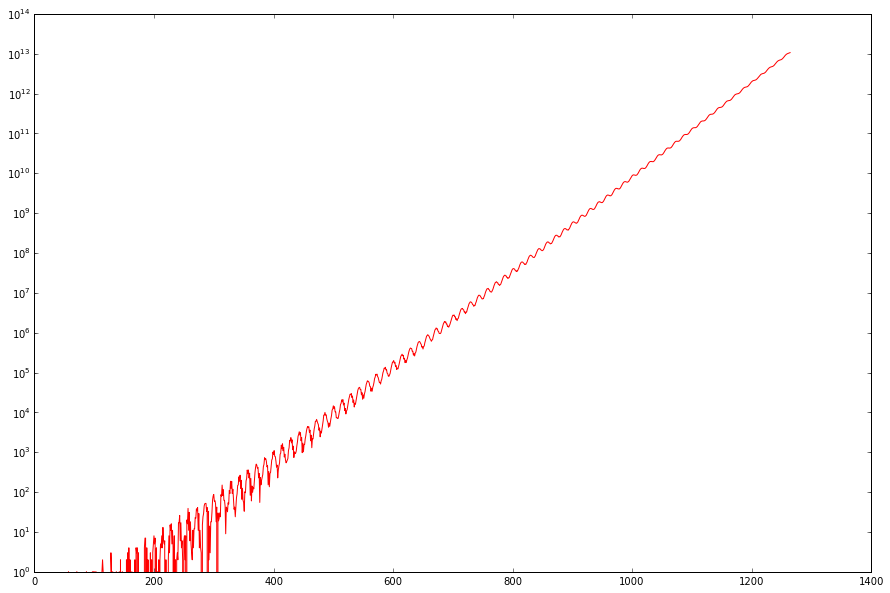

In [43]:
l = []
d = pep_counter(1265)
for i in range(1265):
    if i in d:
        l += [d[i]]
    else: 
        l += [0]
        
fig = plt.figure(figsize=(15,10), dpi=100)
ax = fig.add_subplot(1,1,1)
line, = ax.plot(l, color='red', lw=1)
ax.set_yscale('log')
plt.show()

We know that $y(n) = kC^n$ therefore $k = \dfrac{y(n)}{C^n}$. Thus if $m > n$ then $C^{m-n} = \dfrac{y(m)}{y(n)}$

We take $m = n+1$ for $n \rightarrow \infty$ and calculate $\dfrac{y(m)}{y(n)}$

In [44]:
## How many subpeptides does a linear peptide of given length n have? (Include the empty peptide and the entire peptide.)

def number_linear(n):
    return n*(n+1)/2+1

def number_cyclic(n):
    return n*(n-1)+2

number_linear(21012)

220762579

In [45]:
def expand_peptides(p):
    if len(p) == 0:
        return amino_acids
    else:
        return ["".join((x, y)) for x in p for y in amino_acids]

print expand_peptides([])

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


In [46]:
def get_mass(peptide):
    mass = 0
    for p in peptide:
        mass = mass + integer_mass_table[p]
    return mass
    
print get_mass("NQEL")   

484


In [47]:
def check_consistent(peptide, spectrum):
    result = True
    for p in linear_spectrum(peptide):
        if p not in spectrum:
            result = False
    return result

spectrum = "0 113 128 186 241 299 314 427"
spectrum = spectrum.split(" ")
spectrum = map(int, spectrum)

check_consistent("I", spectrum)

True

In [48]:
## Cyclopeptide Sequencing Problem: Given an ideal experimental spectrum, find a cyclic peptide whose theoretical 
## spectrum matches the experimental spectrum.
## Input: A collection of (possibly repeated) integers Spectrum corresponding to an ideal experimental spectrum.
## Output: An amino acid string Peptide such that Cyclospectrum(Peptide) = Spectrum (if such a string exists).

def cyclopeptide_sequencing_problem(spectrum):
    output = []
    peptides = [""]
    while len(peptides) > 0:
        peptides = expand_peptides(peptides)
        for peptide in peptides[:]:
            if get_mass(peptide) == max(spectrum):
                if set(cyclic_spectrum(peptide)) == set(spectrum):
                    d = "-".join(str(get_mass(x)) for x in peptide)
                    output.append(d)
                peptides.remove(peptide)                
            else:
                if check_consistent(peptide, spectrum) == False:
                    peptides.remove(peptide)
    return sorted(list(set(output)), reverse=True)
        
spectrum = map(int, "".join(open("./data/cyclopeptide_sequencing_problem.txt")).split())

print cyclopeptide_sequencing_problem(spectrum)

['97-131-87-71-137-114-137-113-186-115', '97-115-186-113-137-114-137-71-87-131', '87-71-137-114-137-113-186-115-97-131', '87-131-97-115-186-113-137-114-137-71', '71-87-131-97-115-186-113-137-114-137', '71-137-114-137-113-186-115-97-131-87', '186-115-97-131-87-71-137-114-137-113', '186-113-137-114-137-71-87-131-97-115', '137-71-87-131-97-115-186-113-137-114', '137-114-137-71-87-131-97-115-186-113', '137-114-137-113-186-115-97-131-87-71', '137-113-186-115-97-131-87-71-137-114', '131-97-115-186-113-137-114-137-71-87', '131-87-71-137-114-137-113-186-115-97', '115-97-131-87-71-137-114-137-113-186', '115-186-113-137-114-137-71-87-131-97', '114-137-71-87-131-97-115-186-113-137', '114-137-113-186-115-97-131-87-71-137', '113-186-115-97-131-87-71-137-114-137', '113-137-114-137-71-87-131-97-115-186']


In [49]:
## Cyclopeptide Scoring Problem: Compute the score of a cyclic peptide against a spectrum.
## Input: An amino acid string Peptide and a collection of integers Spectrum. 
## Output: The score of Peptide against Spectrum, Score(Peptide, Spectrum).

def score(peptide, experimental_spectrum):
    the_score = 0
    theoretical_spectrum = cyclic_spectrum(peptide)
    for p in experimental_spectrum:
        if p in theoretical_spectrum:
            the_score = the_score + 1
            theoretical_spectrum.remove(p)
    return the_score
            
## peptide = "NQEL" 
## spectrum = [0, 99, 113, 114, 128, 227, 257, 299, 355, 356, 370, 371, 484]

string = " ".join(open("./data/cyclopeptide_scoring_problem.txt")).split()
peptide = string[0]
spectrum = [int(x) for x in string[1:]]
score(peptide, spectrum)

574

In [50]:
string = urlopen("https://d396qusza40orc.cloudfront.net/bioinformatics/data/antibiotics/CyclicScoring.txt").read().split()
peptide = string[1]
spectrum = [int(x) for x in string[2:-2]]
print score(peptide, spectrum), string[-1]

521 521


In [51]:
## Compute the score of a linear peptide with respect to a spectrum.
## Input: An amino acid string Peptide and a collection of integers Spectrum.
## Output: The linear score of Peptide with respect to Spectrum, LinearScore(Peptide, Spectrum).

def linear_score(peptide, experimental_spectrum):
    the_score = 0
    theoretical_spectrum = linear_spectrum(peptide)
    for p in experimental_spectrum:
        if p in theoretical_spectrum:
            the_score = the_score + 1
            theoretical_spectrum.remove(p)
    return the_score
            
string = " ".join(open("./data/linear_peptide_scoring_problem.txt")).split()
peptide = string[0]
spectrum = [int(x) for x in string[1:]]
linear_score(peptide, spectrum)

221

In [52]:
## Implement Trim (reproduced below).
## Input: A collection of peptides Leaderboard, a collection of integers Spectrum, and an integer N.
## Output: The N highest-scoring linear peptides on Leaderboard with respect to Spectrum.
                
def trim(leader_board, spectrum, N):
    results = []
    linear_scores = {}
    for peptide in leader_board:
        linear_scores[peptide] = linear_score(peptide, spectrum)  
    d = sorted(linear_scores.items(), key=operator.itemgetter(1), reverse=True)
    for k,v in d:
        if v >= d[N-1][1]:
            results.append(k)
    return results
        
leader_board = ["LAST", "ALST", "TLLT", "TQAS"]
spectrum = [0, 71, 87, 101, 113, 158, 184, 188, 259, 271, 372]
N = 2

trim(leader_board, spectrum, N)

['LAST', 'ALST']

In [53]:
string = " ".join(open("./data/trimming_problem.txt")).split("\n")
leader_board = string[0].split()
spectrum = [int(x) for x in string[1].split()]
N = int(string[2].lstrip())

trim(leader_board, spectrum, N)

['KLFPIKKYNGASPQYPEHEVTNCGGKWWWNFVKMTYW',
 'PPQECVMSNERYLTRKEDWQGPSMENVMHNQFDACNY',
 'SLGKQKGAWRCRVFKMIPQWVNYAQPLQRMTWYREYV',
 'LSPSQAKFDKYCTYSSPEVGSMAWALQQNMTHMTTTQ',
 'YQKQKVDPYCRLEDHRRSAINWAFQNKYIHMTEEITN']

In [54]:
## CODE CHALLENGE: Implement LEADERBOARDCYCLOPEPTIDESEQUENCING.
## Input: An integer N and a collection of integers Spectrum.
## Output: LeaderPeptide after running LEADERBOARDCYCLOPEPTIDESEQUENCING(Spectrum, N).

def leaderboard_cyclopeptide_sequencing(spectrum, N):
    leader_board = [""]
    leader_peptide = ""
    while len(leader_board) > 0:
        leader_board = expand_peptides(leader_board)
        for peptide in leader_board:
            peptide_mass = get_mass(peptide)
            if peptide_mass == max(spectrum):
                if score(peptide, spectrum) > score(leader_peptide, spectrum):
                    leader_peptide = peptide
            if peptide_mass > max(spectrum):
                leader_board.remove(peptide)
        leader_board = trim(leader_board, spectrum, N)
    return leader_peptide    
    
N = 10
spectrum = [0, 71, 113, 129, 147, 200, 218, 260, 313, 331, 347, 389, 460]

## leaderboard_cyclopeptide_sequencing(spectrum, N)

# Chapter 3: Randomized Algorithms.
> ## Which DNA Patterns Act As Cellular Clocks? 

In [55]:
## Implanted Motif Problem: Find all (k, d)-motifs in a collection of strings.
## Input: A collection of strings Dna, and integers k and d.
## Output: All (k, d)-motifs in Dna.

def motif_enumeration(dna, k, d):
    neigborhoods = {}
    for string in dna:
        for i in range(len(string)-k+1):
            k_mer = string[i: i+k]
            neigborhood = neighbors(k_mer, d)
            if string not in neigborhoods:
                neigborhoods[string] = neigborhood
            else:
                neigborhoods[string] += neigborhood
                
    return " ".join(sorted([x for x in set.intersection(*map(set, neigborhoods.values()))]))
    
dna = ["ATTTGGC", "TGCCTTA", "CGGTATC", "GAAAATT"]  
k = 3 
d = 1

motif_enumeration(dna, k, d)

'ATA ATT GTT TTT'

In [56]:
string = " ".join(open("./data/motif_enumeration_problem.txt")).split()
k = int(string[0])
d = int(string[1])
dna = [x for x in string[2].split()]

motif_enumeration(dna, k, d)

'AAAAA AAAAC AAAAG AAAAT AAACA AAACC AAACG AAACT AAAGA AAAGC AAAGG AAAGT AAATA AAATC AAATG AAATT AACAA AACAC AACAG AACAT AACCA AACCG AACCT AACGA AACGC AACGG AACGT AACTA AACTC AACTG AACTT AAGAA AAGAC AAGAG AAGAT AAGCA AAGCG AAGCT AAGGA AAGGC AAGGG AAGGT AAGTA AAGTC AAGTG AAGTT AATAA AATAC AATAG AATAT AATCA AATCC AATCG AATCT AATGA AATGC AATGG AATGT AATTA AATTC AATTG AATTT ACAAA ACAAC ACAAG ACAAT ACACA ACACC ACACG ACACT ACAGA ACAGC ACAGG ACAGT ACATA ACATC ACATG ACATT ACCAA ACCAC ACCAG ACCAT ACCCT ACCGA ACCGG ACCGT ACCTA ACCTG ACCTT ACGAA ACGAC ACGAG ACGAT ACGCA ACGCC ACGCG ACGCT ACGGA ACGGC ACGGG ACGGT ACGTA ACGTC ACGTG ACGTT ACTAA ACTAC ACTAG ACTAT ACTCA ACTCT ACTGA ACTGC ACTGG ACTGT ACTTA ACTTG ACTTT AGAAA AGAAC AGAAG AGAAT AGACA AGACC AGACG AGACT AGAGA AGAGC AGAGG AGAGT AGATA AGATC AGATG AGATT AGCAA AGCAT AGCCA AGCCG AGCGA AGCGC AGCGG AGCGT AGCTA AGCTG AGGAA AGGAC AGGAG AGGAT AGGCA AGGCC AGGCG AGGCT AGGGA AGGGC AGGGG AGGGT AGGTA AGGTC AGGTG AGGTT AGTAA AGTAC AGTAG AGTAT AGTCA AGTCG AGT

In [57]:
## CODE CHALLENGE: Implement DistanceBetweenPatternAndStrings.
## Input: A string Pattern followed by a collection of strings Dna.
## Output: d(Pattern, Dna).

def distance_between_pattern_and_strings(pattern, dna):
    k = len(pattern)
    distance = 0
    for text in dna:
        h_distance = np.inf
        for i in range(len(text)-k+1):
            k_mer = text[i: i+k]
            dummy_distance = hamming_distance(pattern, k_mer)
            if h_distance > dummy_distance:
                 h_distance = dummy_distance
        distance = distance + h_distance
    return distance    

pattern = "AAA"
dna = ["TTACCTTAAC", "GATATCTGTC", "ACGGCGTTCG", "CCCTAAAGAG", "CGTCAGAGGT"]

distance_between_pattern_and_strings(pattern, dna)

5

In [58]:
string = " ".join(open("./data/distance_between_pattern_and_strings_problem.txt")).split("\n")
pattern = string[0]
dna = string[1].split()

distance_between_pattern_and_strings(pattern, dna)

50

In [59]:
## Median String Problem: Find a median string.
## Input: A collection of strings Dna and an integer k.
## Output: A k-mer Pattern that minimizes d(Pattern, Dna) among all k-mers Pattern.
            
def median_string(dna, k):
    distance = np.Inf
    for i in range(4**k):
        pattern = number_to_pattern(i, k)
        dummy_distance = distance_between_pattern_and_strings(pattern, dna)
        if distance > dummy_distance:
            distance = dummy_distance
            median = pattern
    return median

k = 3
dna = ["AAATTGACGCAT", "GACGACCACGTT", "CGTCAGCGCCTG", "GCTGAGCACCGG", "AGTACGGGACAG"]

median_string(dna, k)

'ACG'

In [60]:
k = 7
dna = ["CTCGATGAGTAGGAAAGTAGTTTCACTGGGCGAACCACCCCGGCGCTAATCCTAGTGCCC", "GCAATCCTACCCGAGGCCACATATCAGTAGGAACTAGAACCACCACGGGTGGCTAGTTTC", "GGTGTTGAACCACGGGGTTAGTTTCATCTATTGTAGGAATCGGCTTCAAATCCTACACAGG"]

median_string(dna, k)

'AATCCTA'

In [61]:
string = " ".join(open("./data/median_string_problem.txt")).split()
k = int(string[0])
dna = string[1:]

median_string(dna, k)

'ACGATC'

In [62]:
## Profile-most Probable k-mer Problem: Find a Profile-most probable k-mer in a string.
## Input: A string Text, an integer k, and a 4 × k matrix Profile.
## Output: A Profile-most probable k-mer in Text.

def profile_most_probable_kmer_problem(text, k, profile):
    probabilities = {}
    profile = np.matrix(profile).reshape(4, k)
    for i in range(len(text)-k+1):
        k_mer = text[i: i+k]
        prob = 1
        for j in range(len(k_mer)):
            r = pattern_to_number(k_mer[j])
            prob = prob * profile[r, j]
        probabilities[k_mer] = prob
    return max(probabilities.items(), key=operator.itemgetter(1))[0]
    
text = "ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT"
k = 5
profile = [0.2, 0.2, 0.3, 0.2, 0.3, 0.4, 0.3, 0.1, 0.5, 0.1, 0.3, 0.3, 0.5, 0.2, 0.4, 0.1, 0.2, 0.1, 0.1, 0.2]

profile_most_probable_kmer_problem(text, k, profile)

'CCGAG'

In [63]:
string = " ".join(open("./data/profile_most_probable_kmer_problem.txt")).split()
text = string[0]
k = int(string[1])
profile = [float(x) for x in string[2:]]

profile_most_probable_kmer_problem(text, k, profile)

'GTCATTTAGTACTTC'

In [64]:
def create_profile(motifs):
    l = len(motifs)
    k = len(motifs[0])
    nucleotide = ["A", "C", "G", "T"]
    count = np.zeros((4, k))
    motifs = list("".join(motifs))
    motifs = np.array(motifs).reshape(l, k)
    for j in range(k):
        column = "".join(motifs[:,j])
        for i in range(4):
            count[i][j] = column.count(nucleotide[i])
    profile = count * 1.0/len(motifs)
    return [x for x in profile.ravel(order="C")]

motifs = ["GGCGTTCAGGCA", "AAGAATCAGTCA", "CAAGGAGTTCGC", "CACGTCAATCAC", "CAATAATATTCG"]
print create_profile(motifs)

[0.20000000000000001, 0.80000000000000004, 0.40000000000000002, 0.20000000000000001, 0.40000000000000002, 0.40000000000000002, 0.20000000000000001, 0.80000000000000004, 0.0, 0.0, 0.20000000000000001, 0.40000000000000002, 0.59999999999999998, 0.0, 0.40000000000000002, 0.0, 0.0, 0.20000000000000001, 0.40000000000000002, 0.0, 0.0, 0.40000000000000002, 0.59999999999999998, 0.40000000000000002, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.59999999999999998, 0.20000000000000001, 0.0, 0.20000000000000001, 0.0, 0.40000000000000002, 0.20000000000000001, 0.20000000000000001, 0.20000000000000001, 0.0, 0.0, 0.0, 0.20000000000000001, 0.40000000000000002, 0.40000000000000002, 0.20000000000000001, 0.20000000000000001, 0.59999999999999998, 0.40000000000000002, 0.0, 0.0]


In [65]:
def score_motifs(motifs):
    score = []
    l = len(motifs)
    k = len(motifs[0])
    motifs = list("".join(motifs))
    motifs = np.array(motifs).reshape(l, k)
    for j in range(k):
        column = "".join(motifs[:,j])
        score.append(l - collections.Counter(column).most_common(1)[0][1])
    return sum(score)

print score_motifs(motifs)

28


In [66]:
## CODE CHALLENGE: Implement greedy_motif_search.
## Input: Integers k and t, followed by a collection of strings dna.
## Output: A collection of strings best_motifs resulting from applying greedy_motif_search(dna,k,t).
## If at any step you find more than one Profile-most probable k-mer in a given string, use the one occurring first.

def greedy_motif_search(dna, k, t):
    best_motifs = [x[:k] for x in dna]
    first_string_motifs = []
    for i in range(len(dna[0]) - k+1):
        first_string_motifs.append(dna[0][i:i+k])
    for count in range(10000):
        for motif in first_string_motifs:
            motifs = []
            motifs.append(motif)
            for j in range(1, t):
                text = dna[j]
                profile = create_profile(motifs)
                probable_kmer = profile_most_probable_kmer_problem(text, k, profile)
                motifs.append(probable_kmer)
            if score_motifs(motifs) < score_motifs(best_motifs):
                best_motifs = motifs
    return best_motifs
    
k = 3
t = 5
#dna = ["TTACCTTAAC", "AGGATCTGTC", "CCGACGTTAG", "CAGCAAGGTG", "CACCTGAGCT"]
dna = ["GGCGTTCAGGCA", "AAGAATCAGTCA", "CAAGGAGTTCGC", "CACGTCAATCAC", "CAATAATATTCG"]

print greedy_motif_search(dna, k, t)

['CGT', 'AAG', 'AAG', 'AAT', 'AAT']


In [67]:
## CODE CHALLENGE: Implement greedy_motif_search.
## Input: Integers k and t, followed by a collection of strings dna.
## Output: A collection of strings best_motifs resulting from applying greedy_motif_search(dna,k,t).
## If at any step you find more than one Profile-most probable k-mer in a given string, use the one occurring first.

def profile_with_pseudocounts(motifs):
    #Returns the profile of the dna list motifs.
    profile = []
    for i in xrange(len(motifs[0])):
        col = "".join([motifs[j][i] for j in xrange(len(motifs))])
        profile.append([float(col.count(nuc)+1)/float(len(col)+4) for nuc in 'ACGT'])
    return profile
        
def greedy_motif_search(dna, k, t):
    #Initialize the best score as a score higher than the highest possible score.
    best_score = [t*k, None]

    #Run the greedy motif search.
    for i in xrange(len(dna[0])-k+1):
        #Initialize the motifs as each k-mer from the first dna sequence.
        motifs = [dna[0][i:i+k]]
        current_profile = profile_with_pseudocounts(motifs)

        #Find the most probable k-mer in the next string, using pseudocounts.
        for j in xrange(1,t):
            motifs.append(profile_most_probable_kmer_problem(dna[j], k, current_profile))
            current_profile = profile_with_pseudocounts(motifs)

        #Check to see if we have a new best scoring list of motifs.
        current_score = score_motifs(motifs)
        if current_score < best_score[0]:
            best_score = [current_score, motifs]
    return best_score[1]

In [68]:
k = 3
t = 5
#dna = ["TTACCTTAAC", "AGGATCTGTC", "CCGACGTTAG", "CAGCAAGGTG", "CACCTGAGCT"]
dna = ["GGCGTTCAGGCA", "AAGAATCAGTCA", "CAAGGAGTTCGC", "CACGTCAATCAC", "CAATAATATTCG"]

print greedy_motif_search(dna, k, t)

['CGT', 'AAT', 'GTT', 'AAT', 'AAT']


In [69]:
with open("./data/greedy_motif_search.txt") as input_data:
    k, t = map(int, input_data.readline().split())
    dna = [line.strip() for line in input_data.readlines()]
        
#Print and save the answer.
results = greedy_motif_search(dna, k, t)
print "\n".join(results)
with open("./data/output/greedy_motif_search.txt", "w") as output_data:
    output_data.write("\n".join(results))

AGATAATGGAGT
ATTCCCGAAGTT
ACTCCACTCCGT
AGTGCCTAGGAT
ACAGAAAGACGT
ATTGTATAAGGA
TTTGAAGACGGT
ACCGGAACGCGA
ACCACGTACGGA
ATCAGATTGACA
CTCGGACCTGGA
ACTGACAACGGT
GTTGGCTCCCTT
TTGGCCCACGGT
GTTGCCTGCAGT
AACGCATCTCGA
ATTGGGAACGGT
AAAGCTTACGGT
GCTGGAGACGGT
AATGAATATGAT
ATCCGGCACGGT
AGGGAATACCGT
AGCGGGAACGGT
GGCGACCACGGT
AAAGCCAACGGT


## Which DNA Patterns Play the Role of Molecular Clocks?

In [70]:
## we define Motifs(Profile,Dna) as the collection of k-mers formed by the Profile-most probable k-mers in each sequence from Dna.

def create_motifs(profile, dna):
    motifs = []
    k = len(profile)/4
    for text in dna:
        k_mer = profile_most_probable_kmer_problem(text, k, profile)
        motifs.append(k_mer)
    return motifs

dna = ['TTACCTTAAC', 'GATGTCTGTC', 'ACGGCGTTAG', 'CCCTAACGAG', 'CGTCAGAGGT']
profile = [4./5, 0, 0, 1./5, 0, 3./5, 1./5, 0, 1./5, 1./5, 4./5, 0, 0, 1./5, 0, 4./5]

create_motifs(profile, dna)

['ACCT', 'ATGT', 'GCGT', 'ACGA', 'AGGT']

In [71]:
## Implement randomized_motif_search.
## Input: Integers k and t, followed by a collection of strings Dna.
## Output: A collection BestMotifs resulting from running randomized_motif_search(Dna, k, t) 1,000 times. Remember to use pseudocounts!

def randomized_motif_search(dna, k, t):
    results = []
    for i in range(1000):
        motifs = []
        for j in range(t):
            i = np.random.randint(len(dna[j]) - k+1)
            motifs.append(dna[j][i:i+k])
        best_motifs = list(motifs)
        while True:
            profile = np.array(create_profile(motifs)) + 1.0
            motifs = create_motifs(profile, dna)
            if score_motifs(motifs) < score_motifs(best_motifs):
                best_motifs = list(motifs)
            else:
                results = list(best_motifs)
                break
    return results

k = 8 
t = 5
dna = ["CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA", "GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG", "TAGTACCGAGACCGAAAGAAGTATACAGGCGT", "TAGATCAAGTTTCAGGTGCACGTCGGTGAACC", "AATCCACCAGCTCCACGTGCAATGTTGGCCTA"]

randomized_motif_search(dna, k, t)

['GCCCCTCT', 'GCCAAGGT', 'ACCGAGAC', 'ATCAAGTT', 'TGCAATGT']

In [74]:
from random import randint

def motifs_from_profile(profile, dna, k):
    return [profile_most_probable_kmer_problem(seq, k, profile) for seq in dna]

def randomized_motif_search(dna, k, t):
    #Randomly generate k-mers from each sequence in the dna list.
    rand_ints = [randint(0, len(dna[0])-k) for a in xrange(t)]
    motifs = [dna[i][r:r+k] for i,r in enumerate(rand_ints)]

    #Initialize the best score as a score higher than the highest possible score.
    best_score = [score_motifs(motifs), motifs]

    #Iterate motifs.
    while True:
        current_profile = profile_with_pseudocounts(motifs)
        motifs = motifs_from_profile(current_profile, dna, k)
        current_score = score_motifs(motifs)
        if current_score < best_score[0]:
            best_score = [current_score, motifs]
        else:
            return best_score

with open("./data/randomized_motif_search.txt") as input_data:
    k, t = map(int, input_data.readline().split())
    dna = [line.strip() for line in input_data.readlines()]

#Initialize the best scoring motifs as a score higher than the highest possible score.
best_motifs = [k*t, None]

#Repeat the radomized motif search 1000 times.
for repeat in xrange(100):
    current_motifs = randomized_motif_search(dna, k, t)
    if current_motifs[0] < best_motifs[0]:
        best_motifs = current_motifs

#Print and save the answer.
print "\n".join(best_motifs[1])
with open("./data/output/randomized_motif_search.txt", "w") as output_data:
    output_data.write("\n".join(best_motifs[1]))

CCAACGGCTCGGTTG
CCAACGGCTCGGTTG
CCACCAGATTACTTG
CCTACGCAGCGCATG
ATTACGAGTCAGTCA
CGAGGGAATCTGTCT
CCATTGCCTTAGTAG
CGAACGTATCAAATT
TTGGCGCGACAGATG
GGCGAGTGCTGGTAG
ATCAATGTACAGTTG
CTGACGCGACAATAT
CTGACTTCTCAATAG
TTATCACGTCATTTT
CTAGCGCATCACTAG
GGTACGCCTCACCAG
CTGACGAATCGCATG
CTATGGAATCAATAT
CCATCGGTATGGACT
CTAGCTCATCATTCA


In [75]:
## CODE CHALLENGE: Implement GIBBSSAMPLER.
## Input: Integers k, t, and N, followed by a collection of strings Dna.
## Output: The strings best_motifs resulting from running gibbs_sampler(Dna, k, t, N) with 20 random starts. Remember to use pseudocounts!
            
def gibbs_sampler(dna, k, t, N):
    motifs = []
    for i in range(t):
        r = np.random.randint(len(dna[i]) - k+1)
        motifs.append(dna[i][r: r+k])
    best_motifs = list(motifs)
    for j in range(N):
        r = np.random.randint(t)
        matrix = [x for x in motifs if x != motifs[r]]
        profile = create_profile(matrix) 
        if score_motifs(motifs) < score_motifs(best_motifs):
            best_motifs = motifs
    return best_motifs
      
k = 8 
t = 5 
N = 100
dna = ["CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA", "GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG", "TAGTACCGAGACCGAAAGAAGTATACAGGCGT", "TAGATCAAGTTTCAGGTGCACGTCGGTGAACC", "AATCCACCAGCTCCACGTGCAATGTTGGCCTA"]

gibbs_sampler(dna, k, t, N)

['CTCGGGGG', 'CCAAGGTG', 'GAAAGAAG', 'GTCGGTGA', 'ACGTGCAA']

# Chapter 4: How Do We Assemble Genomes? 
> ## Graph Algorithms.